# WeatherPy
----

1) What's the weather like as we approach the equator? Well it is hotter at the equator if we look at this scattor plot that shows Latitude vs. Max Temp (F). Starting at -60 degrees latitude the max temp increases going towards the equator and then the max temp decreases moving north from the equator. This can also be seen in the linear regression models for the northern and southern hemisphere. As the data points get closer to the equator (zero degrees) the max temp increases.

![Latitude vs Max Temp (F)](output_data/City_vs_MaxTemp_20210203.png)

2) However, when it comes to humidity the southern hemisphere is less humid the further south from the equater compared to the northern hemisphere where it appears to be more humid as you move north from the equator.

![North Hemi Humidity](output_data/NorthernHemisphere_Humidity.png)

![South Hemi Humidity](output_data/SouthernHemisphere_Humidity.png)

3) When it comes to clouds there's really no correlation between cloudiness and where you are in the world. From this data set the correlation coefficient (r value) for both the Northern and Southern Hemisphere was weak with a r-value of 0.05 in the North and -0.2 in the South. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url and use units as metric
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Set lists to append data for DataFrame
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
existing_city = []

count = 0
set_processing = 1

# Loop through list of cities and print log
for city in cities:
    response = requests.get(query_url + city).json()
    
    # adding excepting handling
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # setting the set limit
        if count > 50:
            count = 1
            set_processing += 1
            existing_city.append(city)
        else:
            count += 1
            existing_city.append(city)
        print(f"Processing Record {count} of Set {set_processing} for {city}")
    except (KeyError, IndexError):
        print("City not found, skipping...")

print("----Data Retrieval Complete----")


Processing Record 1 of Set 1 for chlorakas
Processing Record 2 of Set 1 for jamestown
Processing Record 3 of Set 1 for bredasdorp
Processing Record 4 of Set 1 for cherskiy
Processing Record 5 of Set 1 for chuy
Processing Record 6 of Set 1 for mataura
Processing Record 7 of Set 1 for saint-philippe
Processing Record 8 of Set 1 for yellowknife
Processing Record 9 of Set 1 for alice springs
Processing Record 10 of Set 1 for aden
Processing Record 11 of Set 1 for cape town
Processing Record 12 of Set 1 for airai
Processing Record 13 of Set 1 for hoi an
Processing Record 14 of Set 1 for bathsheba
Processing Record 15 of Set 1 for arraial do cabo
Processing Record 16 of Set 1 for mayo
City not found, skipping...
Processing Record 17 of Set 1 for marienburg
City not found, skipping...
Processing Record 18 of Set 1 for vaini
City not found, skipping...
Processing Record 19 of Set 1 for la libertad
Processing Record 20 of Set 1 for sioux lookout
Processing Record 21 of Set 1 for vostok
City not

Processing Record 29 of Set 4 for constantine
Processing Record 30 of Set 4 for the valley
Processing Record 31 of Set 4 for ostrovnoy
Processing Record 32 of Set 4 for aswan
Processing Record 33 of Set 4 for mosquera
Processing Record 34 of Set 4 for ngunguru
Processing Record 35 of Set 4 for san lazaro
Processing Record 36 of Set 4 for east london
Processing Record 37 of Set 4 for denpasar
Processing Record 38 of Set 4 for aripuana
Processing Record 39 of Set 4 for kisangani
Processing Record 40 of Set 4 for jacksonville
Processing Record 41 of Set 4 for kavieng
Processing Record 42 of Set 4 for cayenne
Processing Record 43 of Set 4 for seydi
Processing Record 44 of Set 4 for buraydah
Processing Record 45 of Set 4 for nhulunbuy
Processing Record 46 of Set 4 for mildura
Processing Record 47 of Set 4 for aklavik
Processing Record 48 of Set 4 for puerto madero
Processing Record 49 of Set 4 for ebebiyin
Processing Record 50 of Set 4 for olinda
Processing Record 51 of Set 4 for rudbar
Pro

Processing Record 5 of Set 8 for hemsedal
City not found, skipping...
Processing Record 6 of Set 8 for yenagoa
Processing Record 7 of Set 8 for unai
Processing Record 8 of Set 8 for puqi
Processing Record 9 of Set 8 for banjar
Processing Record 10 of Set 8 for luanda
Processing Record 11 of Set 8 for leningradskiy
Processing Record 12 of Set 8 for bailen
Processing Record 13 of Set 8 for davila
Processing Record 14 of Set 8 for ginda
Processing Record 15 of Set 8 for kyra
Processing Record 16 of Set 8 for yeniseysk
Processing Record 17 of Set 8 for parana
Processing Record 18 of Set 8 for yondo
Processing Record 19 of Set 8 for bakel
Processing Record 20 of Set 8 for waynesboro
Processing Record 21 of Set 8 for sayyan
Processing Record 22 of Set 8 for inirida
Processing Record 23 of Set 8 for bratsk
Processing Record 24 of Set 8 for chernyshevsk
Processing Record 25 of Set 8 for painesville
Processing Record 26 of Set 8 for taoudenni
Processing Record 27 of Set 8 for mananjary
Processi

Processing Record 36 of Set 11 for geraldton
----Data Retrieval Complete----


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame from the raw data and export to csv
weather_df = pd.DataFrame({"City":existing_city,"Lat":lat,"Lng":lng,"Max temp":max_temp,"Humidity":humidity,\
                           "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weather_df["Date"] = pd.to_datetime(weather_df["Date"],unit='s').dt.strftime("%Y-%m-%d")
weather_df.to_csv("output_data/Weatherpy.csv")
weather_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chlorakas,34.8042,32.4083,55.40,67,20,8.05,CY,2021-02-03
1,jamestown,42.0970,-79.2353,28.00,80,90,12.66,US,2021-02-03
2,bredasdorp,-34.5322,20.0403,57.20,94,0,3.44,ZA,2021-02-03
3,cherskiy,68.7500,161.3000,1.67,84,0,2.35,RU,2021-02-03
4,chuy,-33.6971,-53.4616,71.13,93,86,4.18,UY,2021-02-03


In [5]:
# Checking that all cities are unique
weather_df["City"].nunique()

546

In [6]:
# Summary statistics on DataFrame
weather_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,18.655796,18.571044,51.747857,72.304029,48.098901,8.144817
std,32.845077,92.079362,31.163165,20.138034,39.675904,5.979867
min,-54.800000,-175.200000,-40.000000,12.000000,0.000000,0.020000
25%,-8.436275,-65.559950,33.800000,63.000000,1.000000,3.985000
50%,19.766650,20.428350,62.010000,77.000000,40.000000,6.720000
75%,44.913275,105.050200,76.510000,87.000000,90.000000,11.145000
max,78.218600,179.316700,100.400000,100.000000,100.000000,37.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Find cities that have greater than 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity.count()

City          0
Lat           0
Lng           0
Max temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## No cities have greater than 100% humidity in this selection

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

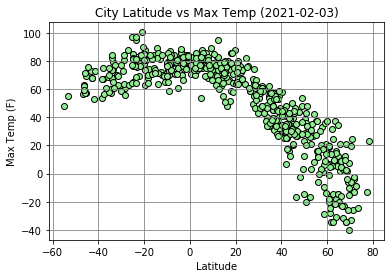

In [9]:
# Create a scattor plot of latitude vs temperature
x = weather_df["Lat"]
y = weather_df["Max temp"]
plt.scatter(x,y,edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs Max Temp (2021-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_MaxTemp_20210203")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Max Temp (F) for that city. At the lower latitude points of -60 the max temp rises as the data points go towards zero (the equator) and decrease as the points increase in latitude, with the data points going to negative temperatures at 40 degrees north.

## Latitude vs. Humidity Plot

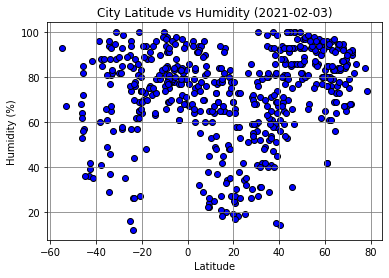

In [10]:
x = weather_df["Lat"]
y = weather_df["Humidity"]
plt.scatter(x,y,edgecolors="black",facecolors="blue")
plt.title("City Latitude vs Humidity (2021-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Humidity_20210203")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Humidity % for that city. Looking at the graph there is not a strong correlation between latitude and humidity. At the equator the humidity stays above 60%.

## Latitude vs. Cloudiness Plot

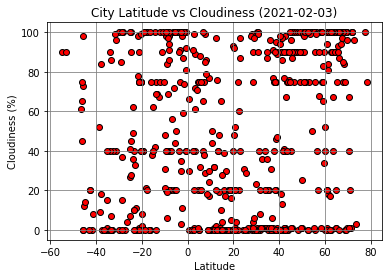

In [11]:
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black",facecolors="red")
plt.title("City Latitude vs Cloudiness (2021-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Cloudiness_20210203")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the cloudiness for that city. Looking at the graph there is not a strong correlation between latitude and cloudiness, however there appear to be a lot of either no clouds or 100% cloud cover for the cities on this date.

## Latitude vs. Wind Speed Plot

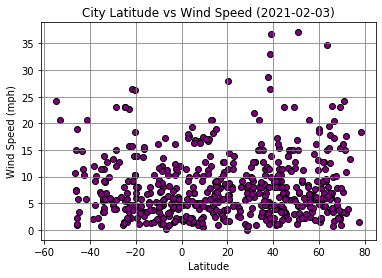

In [12]:
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black",facecolors="purple")
plt.title("City Latitude vs Wind Speed (2021-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_WindSpeed_20210203")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the wind speed for that city. Looking at the graph there is not a strong correlation between latitude and wind speed, however the higher latitudes around 40 degrees had a very windy day with over 35 mph wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.89


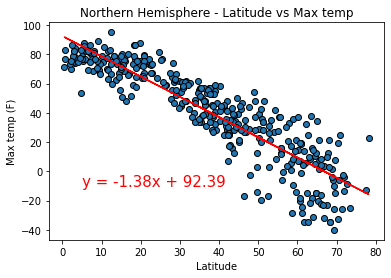

In [23]:
# Calculate the r value
y_value = "Max temp"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (F)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5


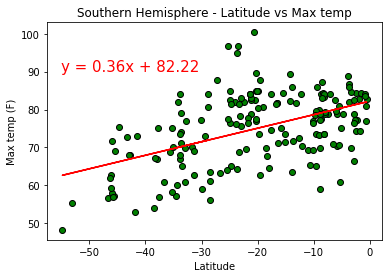

In [26]:
# Calculate the r value
y_value = "Max temp"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (F)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:purple"> There is a strong negative correlation between the latitude in the Northern Hemisphere and Max Temp. The further away from the equator heading north the colder it gets, with it being very chilly once the cities start to hit 40 degrees north. Similar in the Southern Hemisphere, the further away from the equator the colder it gets. The Southern Hemisphere has a moderate positive correlation between latitude and Max Temp. </span>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39


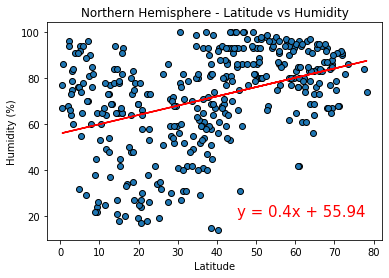

In [28]:
# Calculate the r value
y_value = "Humidity"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3


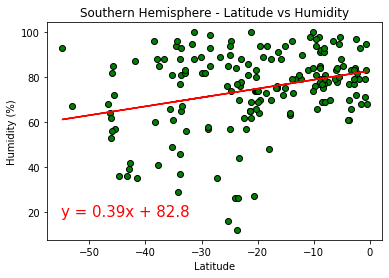

In [30]:
# Calculate the r value
y_value = "Humidity"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:green"> In both the Northern and Southern Hemispheres there is a positive weak correlation between Latitude and Humidity. The further north the cities are in the North Hemisphere they tend to be more humid compared to the equator, whereas in the Southern Hemisphere the further south the cities are the are less humid. </span>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36


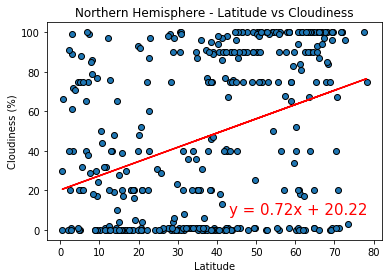

In [33]:
# Calculate the r value
y_value = "Cloudiness"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(43,8),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.33


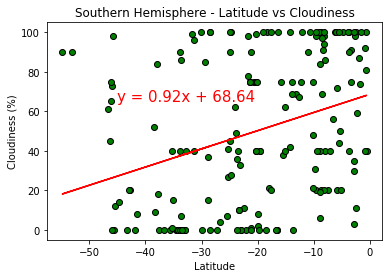

In [36]:
# Calculate the r value
y_value = "Cloudiness"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-45,65),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:blue"> Both the Northern and Southern Hemispheres show a positive weak correlation between Latitude and Cloudiness. The further north the cities are in the North Hemisphere they tend to be more cloudy compared to the equator, whereas in the Southern Hemisphere the further south the cities are the are less cloudy. </span>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05


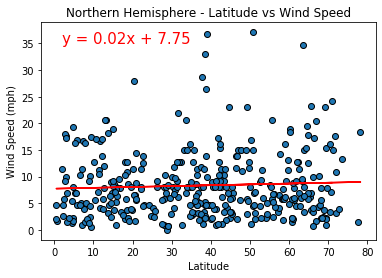

In [38]:
# Calculate the r value
y_value = "Wind Speed"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(2,35),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (mph)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2


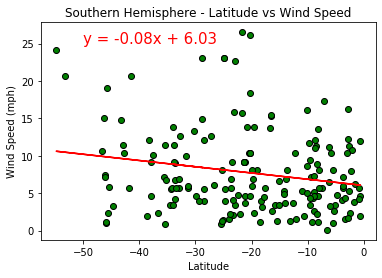

In [39]:
# Calculate the r value
y_value = "Wind Speed"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (mph)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:red"> As far as the wind speed goes for around the globe there is a very weak correlation to latitude vs wind speed. The Northern Hemisphere has close to no correlation at 0.05, and the Southern Hemisphere is very weak at -0.2 with there being more wind closer to the equator compared to further south. </span>